# Introduction

In this notebook, we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets it has released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. This data was fetched on October 12, 2021.

<img src="https://github.com/Arihant25/beginner-python-projects/blob/data-science/lego_analysis/assets/bricks.jpg?raw=1">

# Import Statements

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [3]:
colors_df = pd.read_csv('data/colors.csv')
colors_df

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
184,1058,Trans-Light Green,94E5AB,t
185,1059,Trans-Purple Opal,8320B7,t
186,1060,Trans-Green Opal,84B68D,t
187,1061,Trans-Dark Blue Opal,0020A0,t


In [4]:
print("There are", colors_df['name'].nunique(), "unique colors of Lego blocks.")

There are 189 unique colors of Lego blocks.


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in four different ways.

Method 1:

In [5]:
opaque = trans = 0
for cell in colors_df['is_trans']:
    if cell == "t":
        trans += 1
    else:
        opaque += 1
print(f"There are {opaque} opaque blocks and {trans} transparent blocks.")

There are 151 opaque blocks and 38 transparent blocks.


Method 2:

In [6]:
Counter(colors_df.is_trans.values)

Counter({'f': 151, 't': 38})

Method 3:

In [7]:
colors_df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,151,151,151
t,38,38,38


Method 4:

In [8]:
colors_df['is_trans'].value_counts()

f    151
t     38
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by **theme**. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://github.com/Arihant25/beginner-python-projects/blob/data-science/lego_analysis/assets/lego_themes.png?raw=1">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://github.com/Arihant25/beginner-python-projects/blob/data-science/lego_analysis/assets/lego_sets.png?raw=1">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [9]:
sets_df = pd.read_csv("data/sets.csv")

In [10]:
sets_df.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12


In [11]:
sets_df.tail(2)

,set_num,name,year,theme_id,num_parts
18239,YTERRIER-1,Yorkshire Terrier,2018,598,0
18240,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [12]:
oldest_year = sets_df.year.min()
print(f"The first Lego sets were made in {oldest_year}!")
oldest_year_df = sets_df[sets_df.year == oldest_year]
oldest_year_df

The first Lego sets were made in 1949!


,set_num,name,year,theme_id,num_parts
10858,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
10871,700.2-1,Large Gift Set (ABB),1949,365,178
10876,700.3-1,Medium Gift Set (ABB),1949,365,142
10881,700.A-1,Small Brick Set (ABB),1949,371,24
10882,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [13]:
print(oldest_year_df.name.count(), "types of sets were being sold when the company started.")

5 types of sets were being sold when the company started.


**Challenge**: Find the top 6 LEGO sets with the most number of parts. 

In [14]:
sets_df.sort_values(by="num_parts", ascending=False).head(6)

,set_num,name,year,theme_id,num_parts
3797,31203-1,World Map,2021,709,11695
17272,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
319,10276-1,Colosseum,2020,673,9036
12650,75192-1,UCS Millennium Falcon,2017,171,7541
11938,71043-1,Hogwarts Castle,2018,246,6020
297,10256-1,Taj Mahal,2017,673,5923


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [15]:
sets_by_year = sets_df.groupby("year")["set_num"].count()
sets_by_year

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    854
2018    853
2019    893
2020    898
2021    954
Name: set_num, Length: 71, dtype: int64

In [16]:
num_sets_1955 = sets_by_year[1955]
num_sets_2019 = sets_by_year[2019]
print(f"{num_sets_1955} sets were released in 1955, while {num_sets_2019} sets were released in 2019.")
print(f"That's a {round(num_sets_2019 / num_sets_1955 * 100)}% increase in {2019-1955} years!")

28 sets were released in 1955, while 893 sets were released in 2019.
That's a 3189% increase in 64 years!


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>

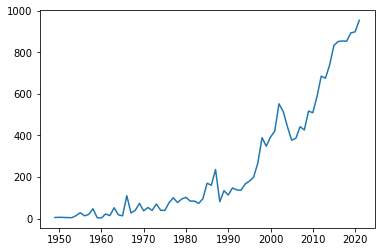

In [17]:
plt.plot(sets_by_year)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [18]:
themes_by_year = sets_df.groupby('year').agg(nr_themes=('theme_id', 'nunique'))
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,88
2018,94
2019,79


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2021). 

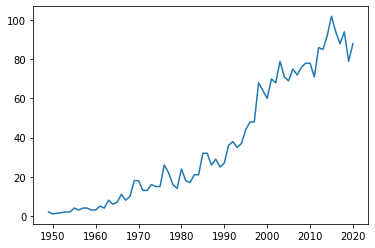

In [19]:
plt.plot(themes_by_year[:-1])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'No. of themes')

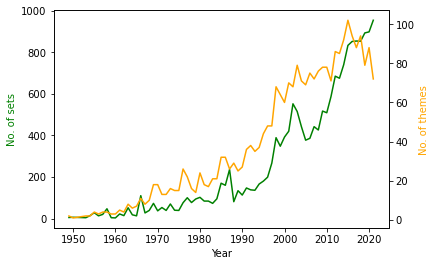

In [20]:
# Set the axes
axis1 = plt.gca() # get current axis
axis2 = axis1.twinx() # create another plot that shares the same X axis

# Plot the graphs
axis1.plot(sets_by_year, color="green")
axis2.plot(themes_by_year, color="orange")

# Style the graphs
axis1.set_xlabel("Year")
axis1.set_ylabel("No. of sets", color="green")
axis2.set_ylabel("No. of themes", color="orange")


### Scatter Plots in Matplotlib

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [21]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': 'mean'})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,16.107143
...,...
2017,209.028103
2018,201.078546
2019,198.197088


In [22]:
num_parts_1954 = int(parts_per_set.loc[1954])
num_parts_2017 = int(parts_per_set.loc[2017])
print(f"There were {num_parts_2017} pieces per set in 2017 compared to {num_parts_1954} in 1954.")
print(f"That's a {num_parts_2017/num_parts_1954 * 100}% increase!")

There were 209 pieces per set in 2017 compared to 8 in 1954.
That's a 2612.5% increase!


**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

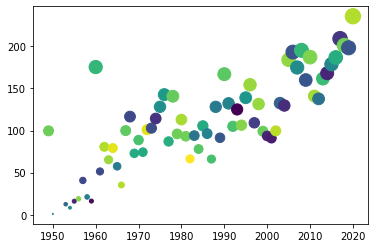

In [23]:
plt.scatter(x=parts_per_set.index[:-1], y=parts_per_set.num_parts[:-1], s=parts_per_set.num_parts[:-1], c=np.random.rand(70))

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="assets/rebrickable_schema.png">

#### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv?

In [24]:
themes_df = pd.read_csv("data/themes.csv")
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
530,712,Series 21 Minifigures,535.0
531,713,VIDIYO,NaN
532,714,Looney Tunes,535.0
533,715,Marvel,535.0


In [25]:
themes_df[themes_df['name'] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
119,158,Star Wars,NaN
141,209,Star Wars,207.0
178,261,Star Wars,258.0


 Now use these <code>id</code>s and find the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [26]:
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
10090,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
13622,8000-1,Pit Droid,2000,18,223
13629,8001-1,Battle Droid,2000,18,336
13640,8002-1,Destroyer Droid,2000,18,567
13652,8007-1,C-3PO,2001,18,339
13653,8008-1,Stormtrooper,2001,18,361
13654,8009-1,R2-D2,2002,18,239
13655,8010-1,Darth Vader,2002,18,388
13664,8011-1,Jango Fett,2002,18,425
13666,8012-1,Super Battle Droid,2002,18,378


In [27]:
sets_df[sets_df.theme_id == 158]

,set_num,name,year,theme_id,num_parts
1875,20006-1,Clone Turbo Tank,2008,158,64
1886,20007-1,Republic Attack Cruiser,2009,158,84
1898,20009-1,AT-TE Walker,2009,158,94
1900,20010-1,Republic Gunship,2009,158,94
1906,20016-1,Imperial Shuttle,2010,158,70
...,...,...,...,...,...
18204,VP-4,Star Wars Co-Pack,2000,158,0
18207,VP-8,Star Wars Co-Pack,2000,158,0
18236,XWING-1,Mini X-Wing Fighter,2019,158,60
18237,XWING-2,X-Wing Trench Run,2019,158,52


In [28]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
12480,75023-1,Star Wars Advent Calendar 2013,2013,209,254
12513,75056-1,Star Wars Advent Calendar 2014,2014,209,275
12547,75097-1,Star Wars Advent Calendar 2015,2015,209,291
12598,75146-1,Star Wars Advent Calendar 2016,2016,209,282
12640,75184-1,Star Wars Advent Calendar 2017,2017,209,309
12673,75213-1,Star Wars Advent Calendar 2018,2018,209,307
12712,75245-1,Star Wars Advent Calendar 2019,2019,209,280
12748,75279-1,Star Wars Advent Calendar 2020,2020,209,311
12774,75307-1,Star Wars Advent Calendar 2021,2021,209,336
13590,7958-1,Star Wars Advent Calendar 2011,2011,209,267


In [29]:
sets_df[sets_df.theme_id == 261]

,set_num,name,year,theme_id,num_parts
16819,9748-1,Droid Developer Kit,1999,261,658
16825,9754-1,Dark Side Developer Kit,2000,261,578


#### Merging (i.e., Combining) DataFrames based on a Key




In [30]:
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count

501    1855
158     790
503     574
494     453
67      412
       ... 
212       1
156       1
415       1
361       1
512       1
Name: theme_id, Length: 510, dtype: int64

Convert set_theme_count from a Series to a DataFrame.

In [31]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count

,id,set_count
0,501,1855
1,158,790
2,503,574
3,494,453
4,67,412
...,...,...
505,212,1
506,156,1
507,415,1
508,361,1


To .merge() two DataFrames along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set on='id'. Both our set_theme_count and our themes DataFrames have a column with this name.

In [32]:
merged_df = pd.merge(set_theme_count, themes_df, on="id")
merged_df

,id,set_count,name,parent_id
0,501,1855,Gear,NaN
1,158,790,Star Wars,NaN
2,503,574,Key Chain,501.0
3,494,453,Friends,NaN
4,67,412,Classic Town,50.0
...,...,...,...,...
505,212,1,Classic Basic,207.0
506,156,1,Mini,155.0
507,415,1,Coast Guard,411.0
508,361,1,Skull Spiders,324.0


Plot the above DataFrame on a bar chart.

<BarContainer object of 10 artists>

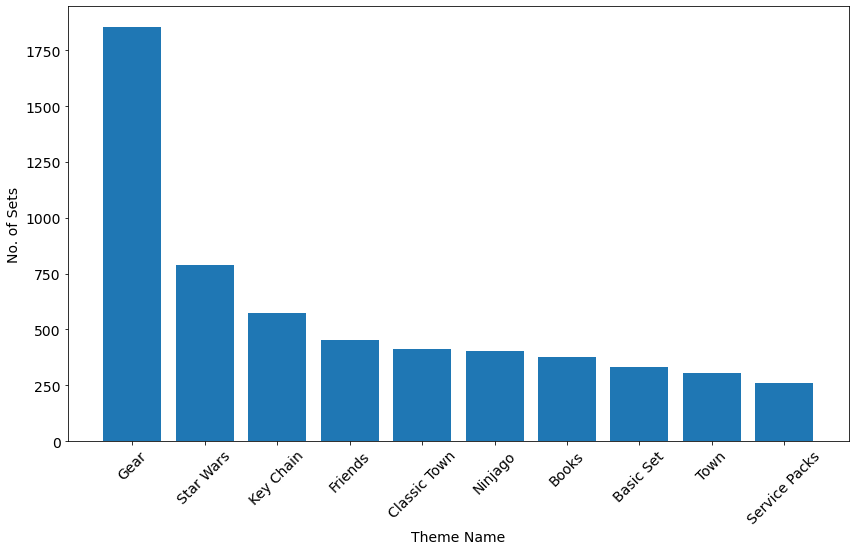

In [33]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel("No. of Sets", fontsize=14)
plt.xlabel("Theme Name", fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])